In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv('data/train.csv')

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

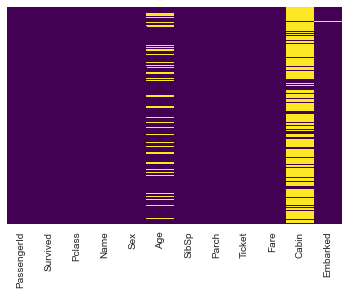

In [49]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

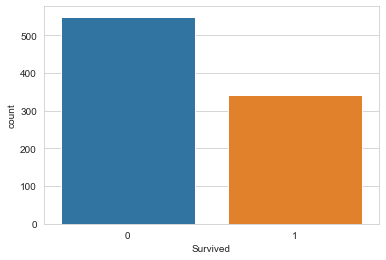

In [50]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',data = df)

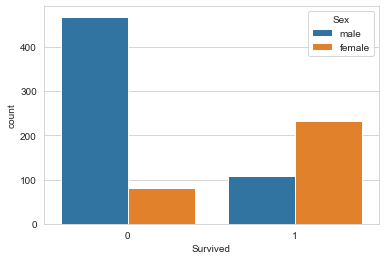

In [51]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Sex',data = df)

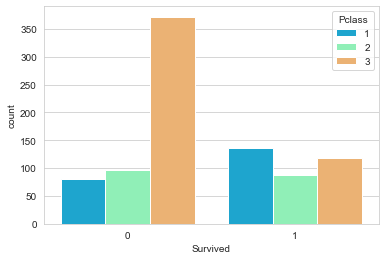

In [52]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived',hue = 'Pclass',data = df,palette='rainbow')

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


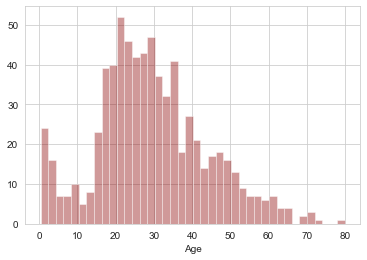

In [53]:
sns.distplot(df['Age'].dropna(),kde = False,color = 'darkred',bins = 40)

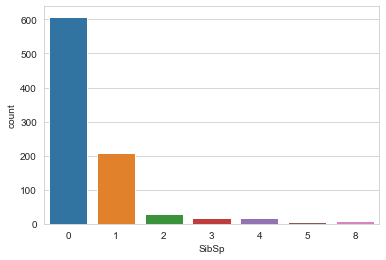

In [54]:
sns.countplot(x = 'SibSp',data = df)

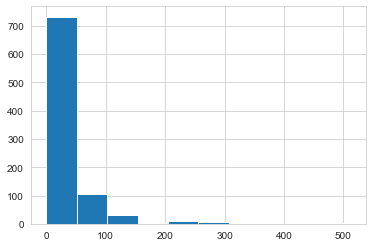

In [55]:
df['Fare'].hist()

# Data Cleaning

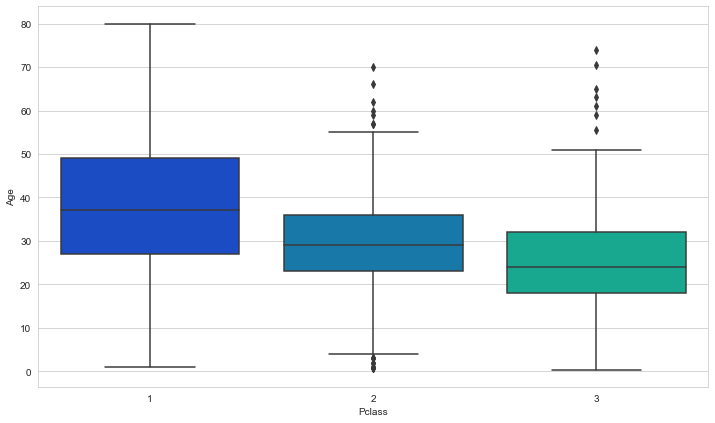

In [56]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Pclass',y = 'Age',data = df,palette='winter')

In [57]:
def imputeAge(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 20
    else:
        return age
    

In [58]:
df['Age'] = df[['Age','Pclass']].apply(imputeAge,1)

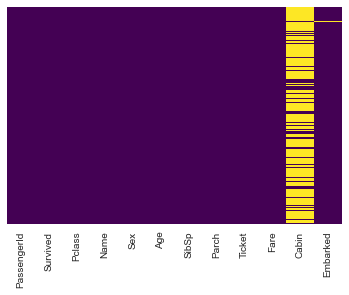

In [59]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [60]:
df.drop(['Cabin'],1,inplace = True)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


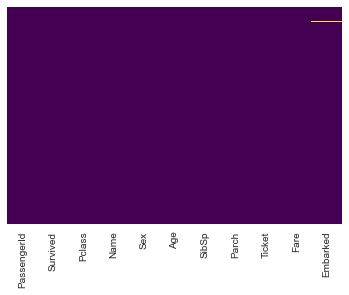

In [61]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap = 'viridis')

In [62]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
df.Embarked.fillna(df.Embarked.mode(),inplace=True)

# changing categoical columns

In [65]:
sex = pd.get_dummies(df['Sex'],drop_first=True )
embark = pd.get_dummies(df['Embarked'],drop_first=True )

In [67]:
df.drop(['Sex','Embarked','Name','Ticket'],axis = 1,inplace = True)

In [68]:
train = pd.concat([df,sex,embark],axis = 1)

In [69]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [70]:
y = train['Survived']
x = train.drop(['Survived'],1)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 101)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression()

In [76]:
lr.fit(X_train,y_train)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [77]:
from sklearn.metrics import accuracy_scoreracy_score

In [78]:
pre = lr.predict(X_test)

In [79]:
accuracy_score(y_test,pre)

0.7686567164179104